# Solve graph laplacian system using Graph Neural Network

Consider the problem $Lx=b$ where $L$ is the graph laplacian.
Our aim is to find $x$ given $b$ and the graph $G=(V,E)$ using a graph neural network.
Notice that $Lx=b$ has infinite solutions since $L$ is a singular matrix. To train our network, we generate $x$ in a certain interval, and then we compute $b$. The network will have $b$ as input and $x$ as response.

Change working directory (remember to replace "path-to-your-directory" with your own directory)

In [ ]:
%cd /"path-to-your-directory"/GP-GNN

Import used source files


In [2]:
import numpy as np
import sys
import time
from tqdm import trange

from src.graph.graph2D import Graph2D
from src.graph.graphObject import GraphObject
from src.gnn.dataset import get_datasets, get_torch_graph
from src.gnn.buildModel import BuildModel

Import neural network used

In [3]:
from examples.graph_laplacian.graphLaplacianGNN import GraphLaplacianGNN

Load plot function

In [4]:
from examples.discrete_laplacian.main import plot_testing

Force matplotlib to plot inline


In [5]:
%matplotlib inline

## Dataset

Create dataset

In [6]:
n_items = 500

for i in trange(n_items, ncols=100, file=sys.stdout):
    n = np.random.randint(100, 200)
    g = Graph2D.get_default_graph(n_vertexes=n)
    # Create random f s.t sum(f)=0
    x = np.random.uniform(1, 2, (n, 1))
    b = g.get_discrete_laplacian(x)
    graph = GraphObject(g.vertexes, g.get_edges(), in_features=b, out_features=x)
    graph.save(f"examples/graph_laplacian/dataset/graph_{i}")

100%|████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 524.38it/s]


## Build and train the network


Read dataset

In [7]:
batch_size = 4

train, val, test = get_datasets('examples/graph_laplacian/dataset/graph', batch_size=batch_size,
                                    num_el=n_items, division=[70, 20, 10])

Reading training data...
100%|███████████████████████████████████████████████████████████| 350/350 [00:00<00:00, 4138.65it/s]
Reading validation data...
100%|███████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 5415.15it/s]
Reading testing data...
100%|█████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 3624.03it/s]


Build model


In [8]:
model = BuildModel(GraphLaplacianGNN(), train, val, "examples/graph_laplacian/best_model")
model.summary()

Layer (type:depth-idx)                   Output Shape              Param #
├─Encoder: 1-1                           [-1, 5]                   --
|    └─Sequential: 2-1                   [-1, 5]                   --
|    |    └─Linear: 3-1                  [-1, 5]                   10
|    └─Sequential: 2-2                   [-1]                      --
├─ModuleList: 1                          []                        --
|    └─MessagePassingBlock: 2-3          [-1, 5]                   --
|    |    └─Sequential: 3-2              [-1, 5]                   55
|    |    └─SumAggregation: 3-3          [-1, 5]                   --
|    |    └─Sequential: 3-4              [-1, 5]                   405
|    └─MessagePassingBlock: 2-4          [-1, 5]                   --
|    |    └─Sequential: 3-5              [-1, 5]                   55
|    |    └─SumAggregation: 3-6          [-1, 5]                   --
|    |    └─Sequential: 3-7              [-1, 5]                   405
|    └─Messag

Train model

EPOCH   0: 100%|███████████████████████████████| 88/88 [00:01<00:00, 48.61it/s, batch loss=1.14e-01]
Current loss - training: 1.63e+00 validation: 1.28e-01

EPOCH   1: 100%|███████████████████████████████| 88/88 [00:01<00:00, 49.36it/s, batch loss=8.68e-02]
Current loss - training: 9.84e-02 validation: 8.65e-02

EPOCH   2: 100%|███████████████████████████████| 88/88 [00:01<00:00, 64.66it/s, batch loss=7.87e-02]
Current loss - training: 8.49e-02 validation: 8.41e-02

EPOCH   3: 100%|███████████████████████████████| 88/88 [00:01<00:00, 67.14it/s, batch loss=7.78e-02]
Current loss - training: 8.51e-02 validation: 8.37e-02

EPOCH   4: 100%|███████████████████████████████| 88/88 [00:01<00:00, 61.38it/s, batch loss=9.39e-02]
Current loss - training: 8.38e-02 validation: 8.35e-02

EPOCH   5: 100%|███████████████████████████████| 88/88 [00:01<00:00, 68.44it/s, batch loss=8.28e-02]
Current loss - training: 8.41e-02 validation: 8.34e-02

EPOCH   6: 100%|███████████████████████████████| 88/88 [00

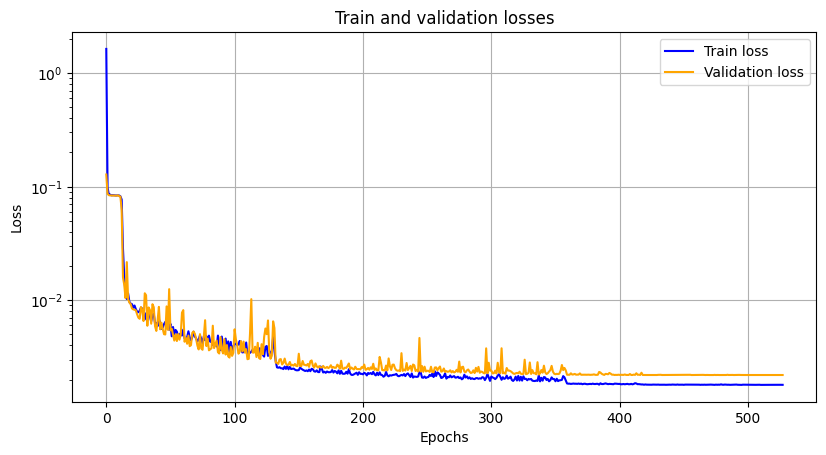

In [9]:
model.train(1000, patience=50)
model.plot_training()

## Test on testing set

Now, we test our model on the training set, computing for each graph the relative errors.

In [10]:
model.test(test)


Testing graph neural network:
Graph   1 with 162 nodes, test loss is 3.61e-03, relative error is 3.77e-02
Graph   2 with 185 nodes, test loss is 1.52e-03, relative error is 2.13e-02
Graph   3 with 177 nodes, test loss is 2.04e-03, relative error is 2.38e-02
Graph   4 with 145 nodes, test loss is 1.58e-03, relative error is 2.12e-02
Graph   5 with 157 nodes, test loss is 2.09e-03, relative error is 2.54e-02
Graph   6 with 155 nodes, test loss is 1.35e-03, relative error is 2.09e-02
Graph   7 with 136 nodes, test loss is 1.83e-03, relative error is 2.53e-02
Graph   8 with 168 nodes, test loss is 1.73e-03, relative error is 2.33e-02
Graph   9 with 126 nodes, test loss is 1.82e-03, relative error is 2.37e-02
Graph  10 with 119 nodes, test loss is 2.01e-03, relative error is 2.39e-02
Graph  11 with 126 nodes, test loss is 2.01e-03, relative error is 2.57e-02
Graph  12 with 133 nodes, test loss is 2.04e-03, relative error is 2.46e-02
Graph  13 with 170 nodes, test loss is 2.86e-03, relative

## More testing


We try increasing the graph size to stress our network and see the behaviour. Moreover, we compare the time needed solving the least square system and the time needed by our network.
To solve the least square system, we use a numpy function that computes:
$
x = argmin_x \; ||Lx - b||_2^2 \quad s.t. \quad x \; \text{has minimum norm}
$



In [11]:
nodes = [10, 50, 100, 500, 1000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000]
sys_times = []
gnn_times = []
gnn_errs = []
for n_vertexes in nodes:
    print(f"\nGraph with {n_vertexes} nodes")
    # Generate graph and signal
    init_time = time.time()
    g = Graph2D.get_default_graph(n_vertexes)
    x = np.random.uniform(1, 2, size=(n_vertexes, 1))
    b = g.get_discrete_laplacian(x)
    data = get_torch_graph(g.vertexes, g.get_edges(), b)
    print(f"Graph built in {(time.time() - init_time):.2e} seconds")
    if n_vertexes <= 10000:
        # Graph laplacian solving the system
        init_time = time.time()
        L = g.get_graph_laplacian()
        print(f"Graph laplacian matrix built in {(time.time() - init_time):.2e} seconds")
        init_time = time.time()
        np.linalg.lstsq(L, b, rcond=None)
        sys_times.append(time.time() - init_time)
        print(f"Solving least square system, time elapsed is {sys_times[-1]:.2e} seconds")
    else:
        sys_times.append(np.inf)
    # Graph laplacian using gnn
    init_time = time.time()
    gnn_out = model(data.x, data.edge_index, data.edge_attr)
    gnn_times.append(time.time() - init_time)
    print(f"Using the gnn, time elapsed is {gnn_times[-1]:.2e} seconds")

    # Computing error
    gnn_out = gnn_out.detach().numpy()
    rel_errs = abs(gnn_out-x)/x
    gnn_errs.append(np.mean(rel_errs))
    print(f"Mean relative error is {gnn_errs[-1]:.2e}")


Graph with 10 nodes
Graph built in 9.92e-04 seconds
Graph laplacian matrix built in 9.01e-05 seconds
Solving least square system, time elapsed is 1.06e-02 seconds
Using the gnn, time elapsed is 3.38e-03 seconds
Mean relative error is 3.28e-02

Graph with 50 nodes
Graph built in 8.26e-04 seconds
Graph laplacian matrix built in 1.32e-04 seconds
Solving least square system, time elapsed is 4.30e-04 seconds
Using the gnn, time elapsed is 3.57e-03 seconds
Mean relative error is 2.78e-02

Graph with 100 nodes
Graph built in 1.36e-03 seconds
Graph laplacian matrix built in 2.05e-04 seconds
Solving least square system, time elapsed is 3.99e-03 seconds
Using the gnn, time elapsed is 6.51e-03 seconds
Mean relative error is 2.22e-02

Graph with 500 nodes
Graph built in 2.10e-02 seconds
Graph laplacian matrix built in 4.85e-03 seconds
Solving least square system, time elapsed is 1.54e-01 seconds
Using the gnn, time elapsed is 1.16e-02 seconds
Mean relative error is 2.77e-02

Graph with 1000 nodes

### Computation time comparison

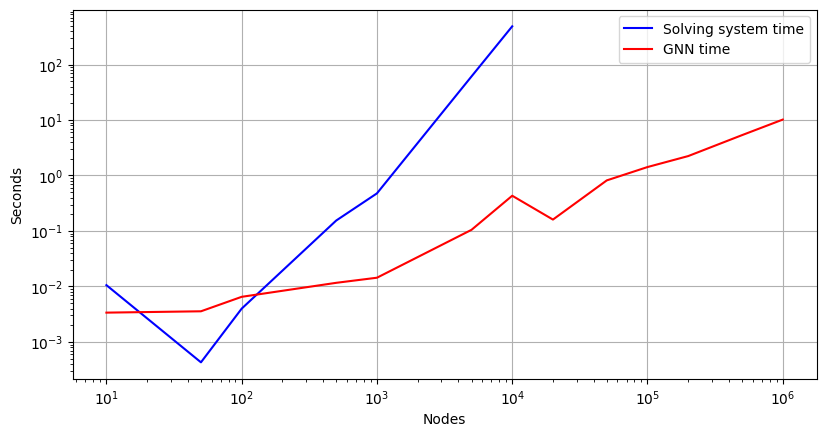

In [12]:
plot_testing(nodes, [sys_times, gnn_times],
             colors=["blue", "red"],
             labels=["Solving system time", "GNN time"],
             y_label="Seconds")

### Error plot

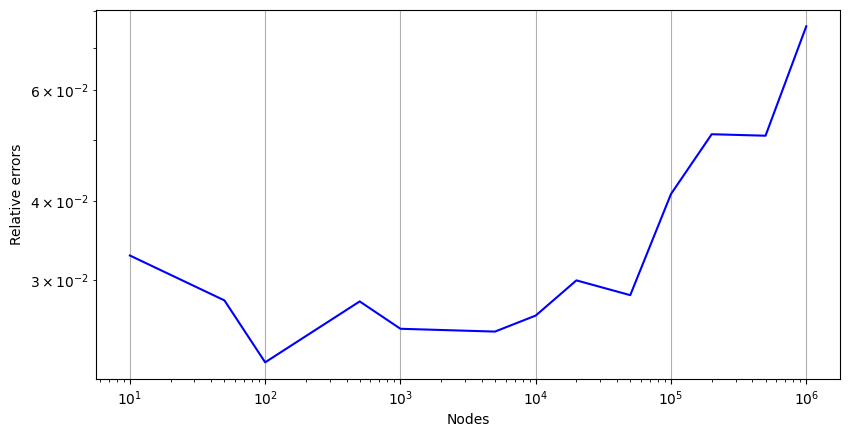

In [13]:
plot_testing(nodes, [gnn_errs],
             colors=["blue"],
             labels=[""], legend=False,
             y_label="Relative errors")